## Student Name : Rakesh Paul

## Student ID : 22271872

# Task 2: Exploratory Data Analysis (EDA)

This etivity demonstrates EDA of a bank dataset (bank.csv) using Python.

## Importing Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

### Load Dataset

In [2]:
df = pd.read_csv('./bank.csv')

## Quick Data Exploration

In [3]:
# Print first 5 rows of the dataframe
df.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [4]:
# Print last 5 rows of the dataframe
df.tail(5)

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

#### Observation

We can see that the dataset has 2000 data rows, and both numerical and categorical attributes. The data rows are typically called *observations* or *examples*, and the columns are also called *attributes* or *features*. 

##### Attribute explanation
- age (numeric)
- job : type of job (categorical)
- marital : marital status (categorical)
- education : (categorical)
- default : has credit in default? (categorical)
- balance : account (numeric)
- housing : has housing loan? (categorical)
- loan : has personal loan? (categorical)
- contact : contact communication type (categorical)
- day : month's day (numeric)
- month : last contact month of year (categorical)
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical)
- subscribed : has the client subscribed a term deposit? (binary: 'yes','no')

`subscribed` is sometimes mentioned by target attribute in the following EDA.

## Question of interest (may be answered by the EDA)
### Q. Which attributes are important predictor of subscribing to the term deposit? 

<b> Rationale behind the expectation </b>: Goal of bank dataset is to predict if a client will subscribe to the term deposit. There is a mix and numeric and categorical attributes provided. If the correlation between attributes, list of attributes having positive impact to subscription and vice versa can be analysed, we may get the answer.

### Statistics Calculation

#### Numeric Attributes

In [5]:
# Print statistical summary for all numerical attributes
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

##### Conclusion
Following can be inferred from statistical summary:
- `age` has (2000 – 1988) 12 missing values. Majority of clients have age range of 32-50 years.
- `balance` shows a high possibility of quite a few outlier (comparing mean and median(50%))
- `duration` shows majority of calls lasted for 146 to 379 seconds. But there are some outliers with very high call duration.

##### Target attribute distribution in dataset

In [6]:
print(df['subscribed'].value_counts())

no     1000
yes    1000
Name: subscribed, dtype: int64


##### Conclusion
Target attribute is properly balaced in dataset.

#### Correlation 

We can also examine the correlation matrix of all numerical attributes in the form of a **heat map**. To get more meaningful inference we can tranform the `subscribed` attribute to be numerical. This transformation will only be binary which will translate "yes" to 1 and "no" to 0. It does not result in new numeric feature but only makes it easier for calculating numeric correlation or visualization using heatmap. So, the EDA will still be valid.

In [7]:
df['subscribed'] = df['subscribed'].apply(lambda x: 0 if x == 'no' else 1)

<AxesSubplot:>

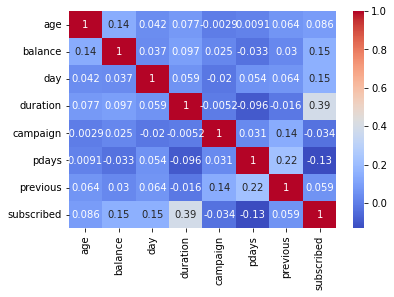

In [8]:
#correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

##### Conclusion
Following can be inferred from heatmap:
- `age` and `balance` have weak positive correlation coefficient: clients who are older are more likely to have higher balance.
- `pdays` and `duration` have negative correlation coefficient: clients who are contacted recently for previous campaign, are likely to discuss more about the current campaign.
- `pdays` and `previous` have weak positive correlation coefficient: clients who were contacted recently for previous campaign, are likely to have been contacted more by bank.
- `subscribed`, `balance` and `day` have weak positive correlation coefficient (0.15): clients with more bank balance or contacted on certain days of the month are slightly more likely to subscribe.
- `subscribed` and `duration` have moderately strong positive correlation coefficient (0.39): longer interaction between client and the bank will make the client more likely to subscribe.
- `subscribed` and `pdays` have weak negative correlation coefficient (-0.13): clients who were contacted recently for previous campaign are slightly more likely to subscribe.

From the correlation coeeficient value perspective, `duration`, `day`, `balance`, `pdays` may be important predictor to subscribe. Correlation coefficient of attributes are negligible.

#### Categorical Attributes

For the categorical (non-numerical) attributes we can use the crosstab() function to find the frequency analysis of the attributes (distribution of values) with respect to likelihood of subscription. We can also calculate Chi-squared statistics to find which attribute impact the most towards final decision regarding subscription.

In [9]:
categorical_attributes = df.select_dtypes(include=['object']).columns.tolist()

# Generate frequency reports for each categorical column
for attribute in categorical_attributes:
    print(f"\nFrequency analysis for attribute '{attribute}':\n")
    frequency = pd.crosstab(df[attribute], df['subscribed'], dropna=True, margins=True)
    print(frequency)
    print(f"Missing entries for '{attribute}': '{df.shape[0] - df[attribute].count()}' ")
    chi_sqr, pvalue, _, _ = chi2_contingency(frequency)
    print(f"Chi-squared = '{chi_sqr}' and pValue = '{pvalue}'")


Frequency analysis for attribute 'job':

subscribed       0    1   All
job                          
admin.         117  130   247
blue-collar    221   77   298
entrepreneur    30   15    45
housemaid       15   20    35
management     210  251   461
retired         26  136   162
self-employed   29   35    64
services       115   50   165
student          9   87    96
technician     204  144   348
unemployed      21   48    69
All            997  993  1990
Missing entries for 'job': '10' 
Chi-squared = '264.7668028274507' and pValue = '1.5813125933285532e-43'

Frequency analysis for attribute 'marital':

subscribed     0     1   All
marital                     
divorced     121    94   215
married      610   501  1111
single       269   405   674
All         1000  1000  2000
Missing entries for 'marital': '0' 
Chi-squared = '41.526803569874616' and pValue = '2.279862710315126e-07'

Frequency analysis for attribute 'education':

subscribed    0    1   All
education                 
pri

##### Conclusion
- Some of the categorical attributes have missing  data. Following can be considered to deal with missing data:
    - Drop the row with missing attribute.
    - Drop the entire attribute
    - Missing data can be filled with some statistical analysing result of that attribute.
- It can be inferred from Chi-squared statistics that, following attributes have strongest correlation with target attribute (very high chi squared value and very low pvalue):
    - jobs
    - housing
    - loan
    - month
    - poutcome
    
    These attributes can influence the the probability of subscription.

## C. Distribution Analysis for some Numerical Attributes

In [10]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_columns)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'subscribed']


##### histogram

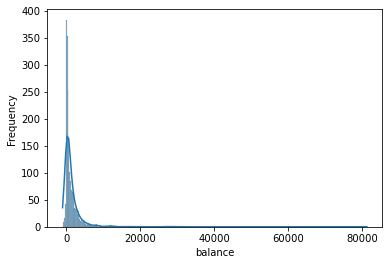

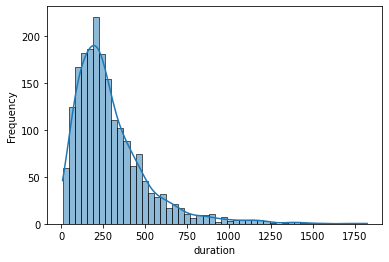

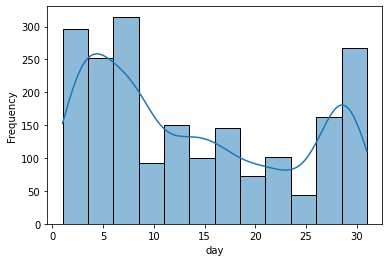

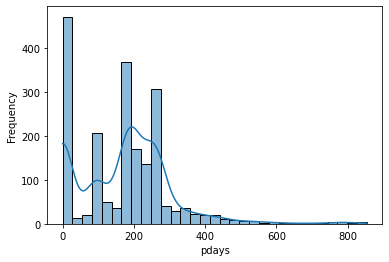

In [11]:
# Plotting a histogram of numeric features using the command:
for numeric_attribute in ['balance', 'duration', 'day', 'pdays']:
    sns.histplot(data=df, x=numeric_attribute, kde=True)
    plt.xlabel(numeric_attribute)
    plt.ylabel('Frequency')
    plt.show()

#### Conclusion
Histogram results:
- `balance` : Shows a very skewed distribution towards left with majority of clients having very low balance with very few showing high balance (long tail). Bank may focus on attracting high bank balance clients.
- `duration` : Shows a very skewed distribution towards left with majority having smaller contact duration. But also there are some clients with longer duration of discussion. Bank may focus on increasing the duration of contact.
- `day` : Does not show any clear pattern.
- `pdays` : Shows large number of customers were contacted within 200 days.

##### boxplot with whiskers

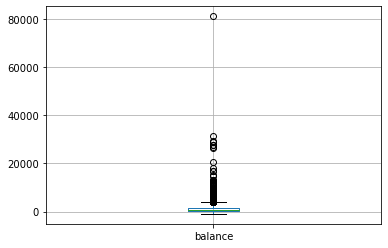

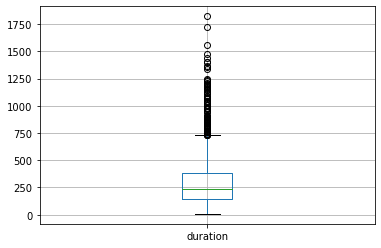

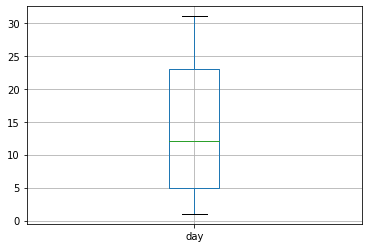

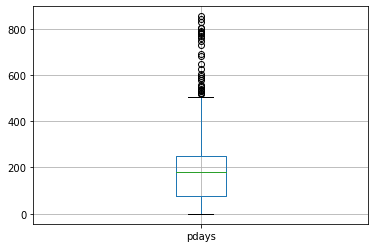

In [12]:
# Plotting a Box plot of numeric features using the command:
for numeric_attribute in ['balance', 'duration', 'day', 'pdays']:
    df.boxplot(column=numeric_attribute)
    plt.show()

#### Conclusion
boxplot results:
- `balance` : Shows a relatively small interquartile range suggeting that majority of Clients have similar balance (low balance). But there are quite a few clients having very high balank balance. They can impact the prediction of subscription.
- `duration` : The median of duration of contact is around 250 seconds. with 50% of the clients fall under 140 seconds to 375 seconds. But this also has quite a few outlier with very high duration which can influence the prediction of subscrition.
- `day` : The interquartile range from 5 to 23rd of the month with median around 12th of the month. No clear pattern is visible here.
- `pdays` : The median of the last contact to clients for previous campaign is ~200 day. But it also shows some outliers which means some clients were not contacted for a long time.

#### Thoughts on distribution of numeric attributes
Histogram and boxplot analysis provide distribution of attributes. It is important to analyze them in conjunction to the target attribute for better understanding the correlation with final outcome. It looks like `duration`, `balance` and `pdays` attributes can be explored further to get decision.

## D. Combined Distribution Analysis

###  Numerical Attributes
#### Pairplot

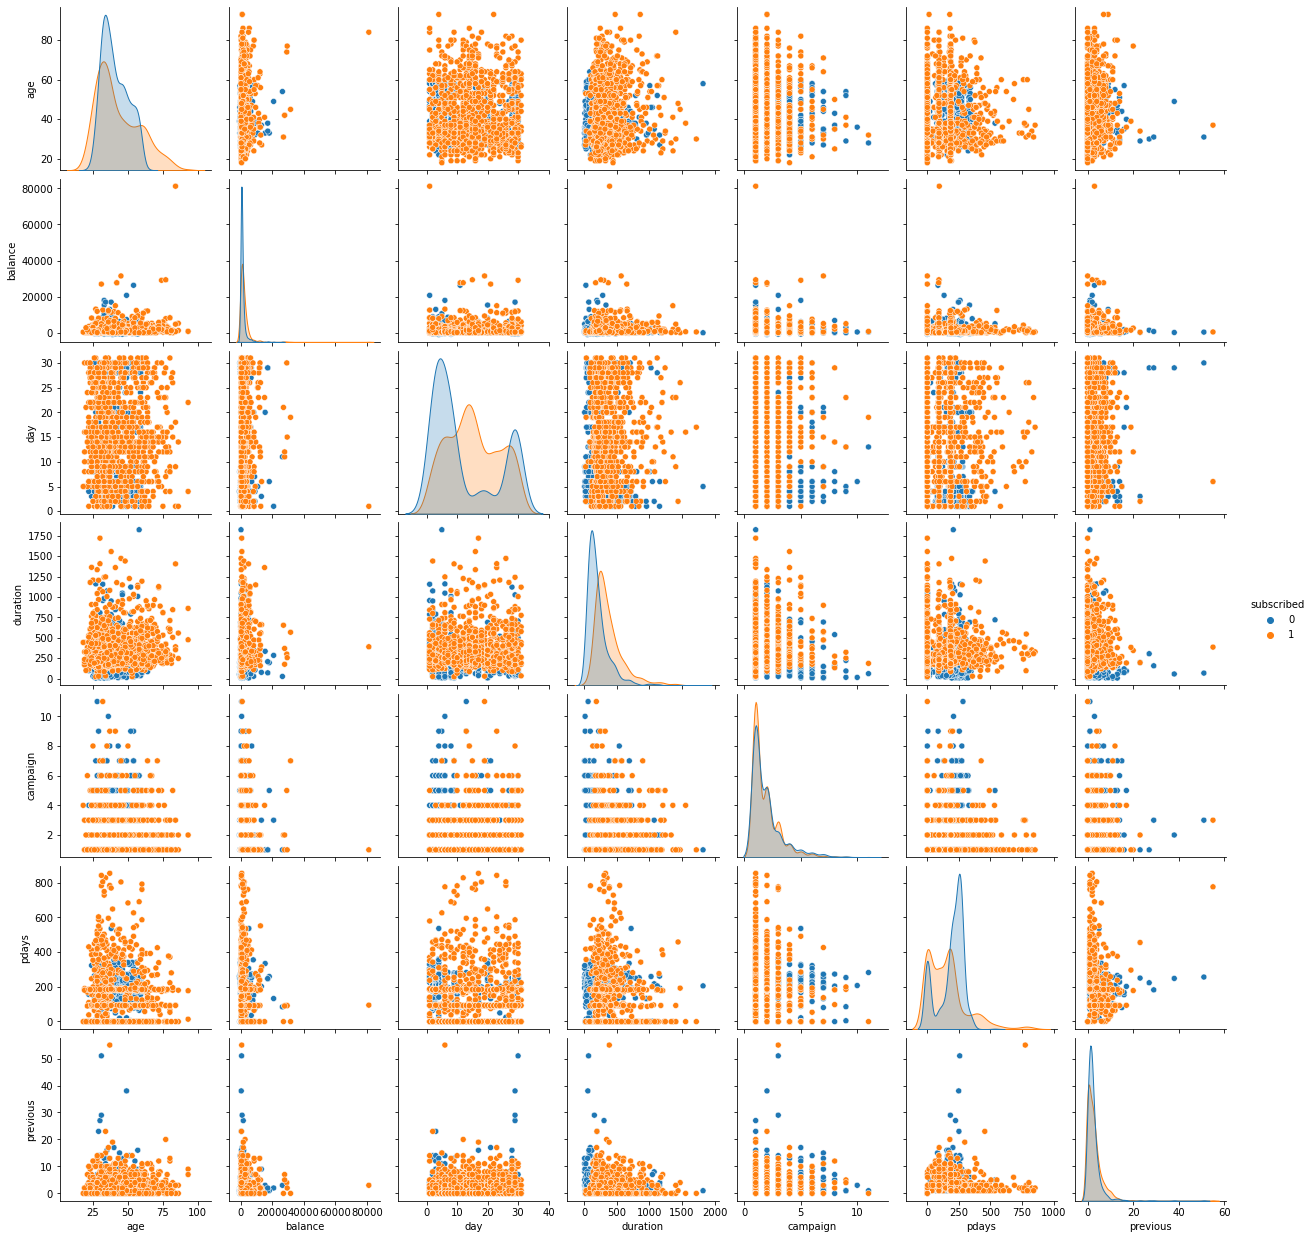

In [13]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(df.select_dtypes(include=['float64', 'int64']).dropna(),  hue='subscribed')
plt.show()

#### Conclusion
Pairplot shows histogram of each numeric attributes in diagonal and pairwise scatter plot of attributes in off-diagonal. Following are some observations:
- account balance of majority of the subscribed clients dont increase with age.
- Subscribed clients tend to have been contacted more recently for previous campaign.
- clients who were contacted recently for previous campaign, are also likely to have been contacted more times by bank for previous campaign and also are the ones more likely to subscribe.

I could not infer any other signification correlation among attributes w.r.t subscription. From pairplot, `pdays` seems to be most influential for subscription. Let us look at the violin plot to see the distribution of the attributes.

#### Violin plot
Using violin plot to examine the relationship of numeric attributes w.r.t subscribed attribute.

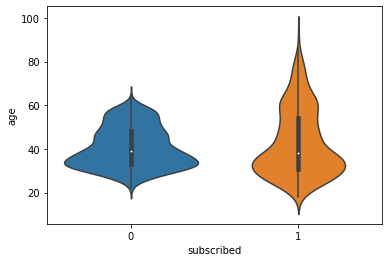

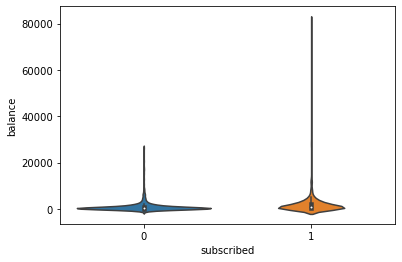

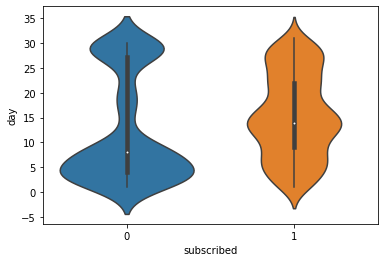

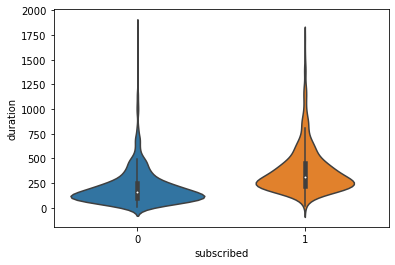

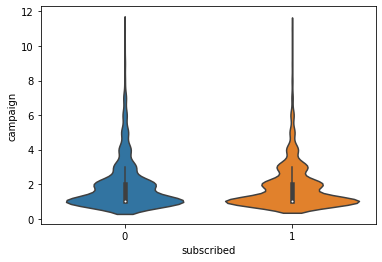

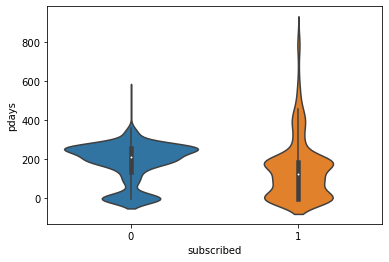

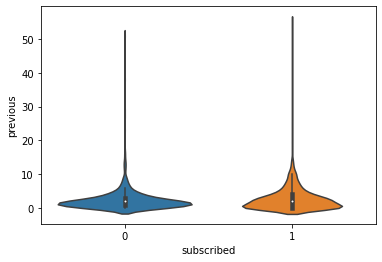

In [14]:
for attribute in df.select_dtypes(include=['float64', 'int64']).columns.tolist():
    if (attribute != 'subscribed'):
        sns.violinplot(data=df, x='subscribed', y=attribute)
        plt.xlabel('subscribed')
        plt.ylabel(attribute)
        plt.show()

#### Conclusion
Violin Plot: 
- `subscribed` and `balance` : Subscribed group have a higher distribution (evenly spread) than non subscribed group indicating that it may have some influence in subscription. 
- `subscribed` and `duration` : The duration of the last contact with the customer is higher in the subscribed group, with a peak around 250 seconds compared to around 125 seconds for the non subscribed group. Subscribed group has a higher distribution (evenly spread) than non subscribed group indicating influence on subscription.
- `subscribed` and `pdays` : Number of days passed by after client was last contacted has higher distribution (evenly spread) with median around 100 days for subscribed group, whereas for non subscribed group the median is around 200 and also not evenly spread. 

From violinplot, `duration`, `balance` and `pdays` seems to be most influential for subscription.

#### Final answer on numeric attributes:
Finally after pairplot, violinplot analysis and correlation coefficients calculated using heatmap analysis, it can be inferred that, `duration`, `balance` and `pdays` are most influencial predictor for subscription w.r.t numeric attributes.

#### Caution
`duration` is not known before a call is performed. Also, after the end of the call `subscribed` is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded for future modelling purpose.

###  Categorical Attributes

#### catplot

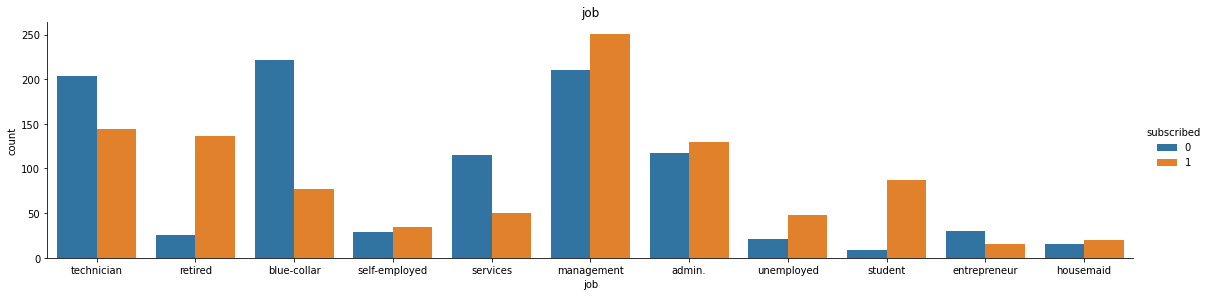

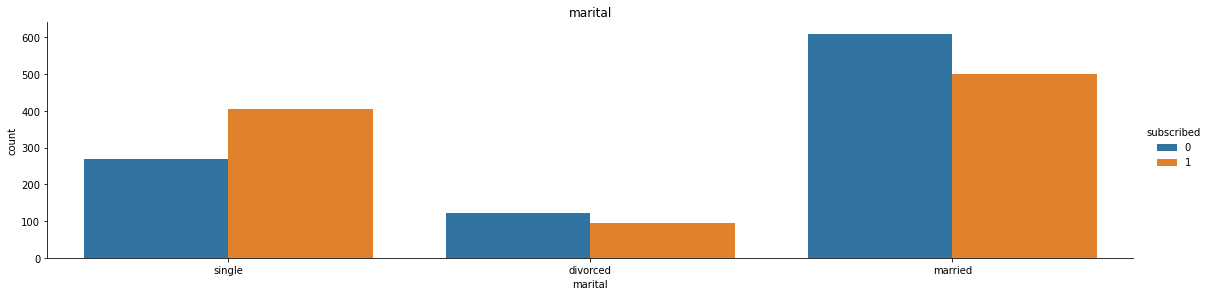

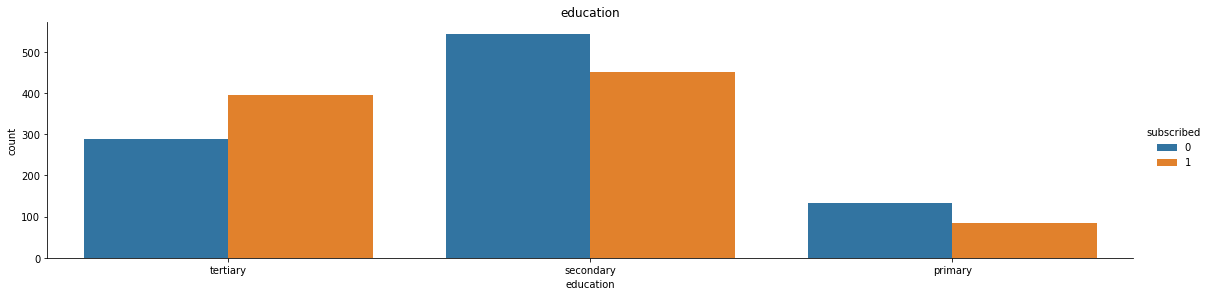

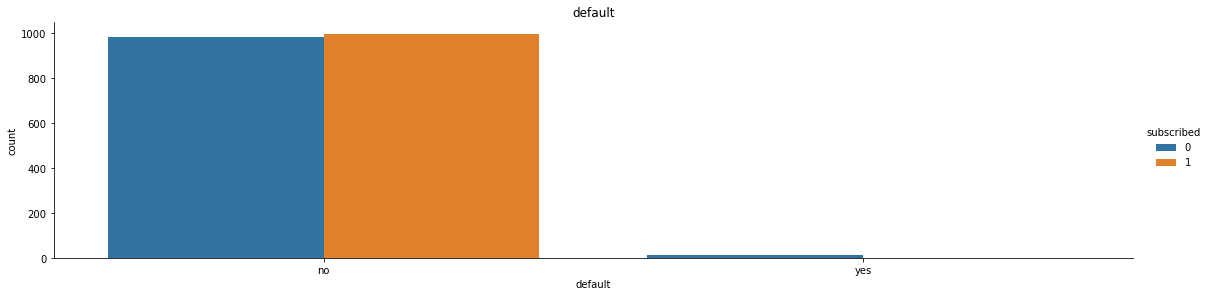

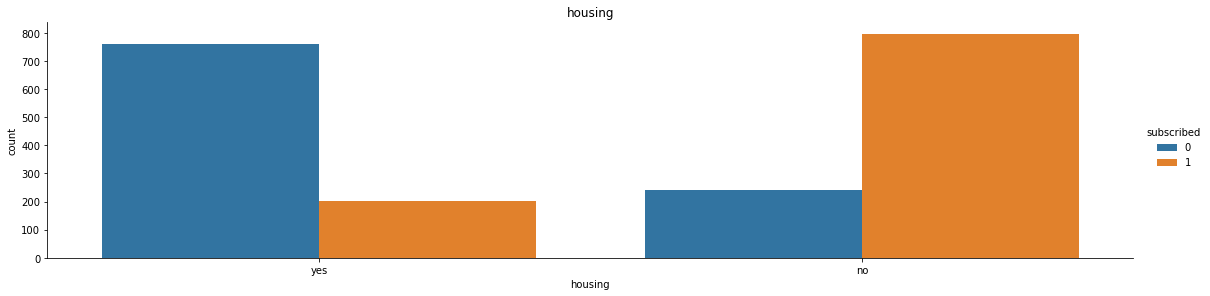

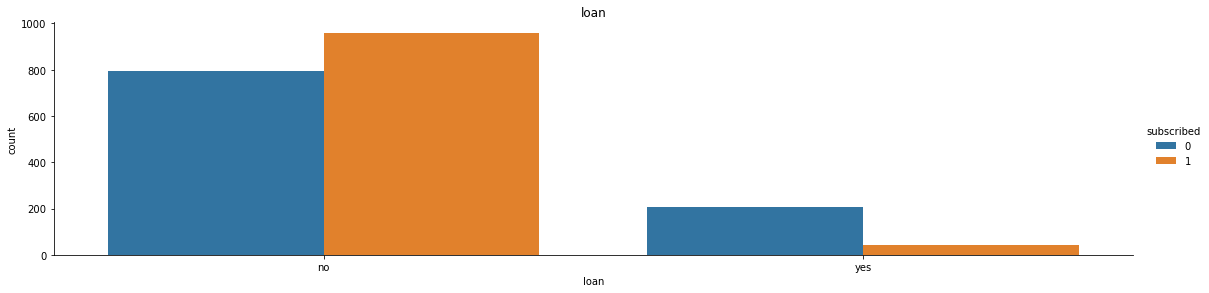

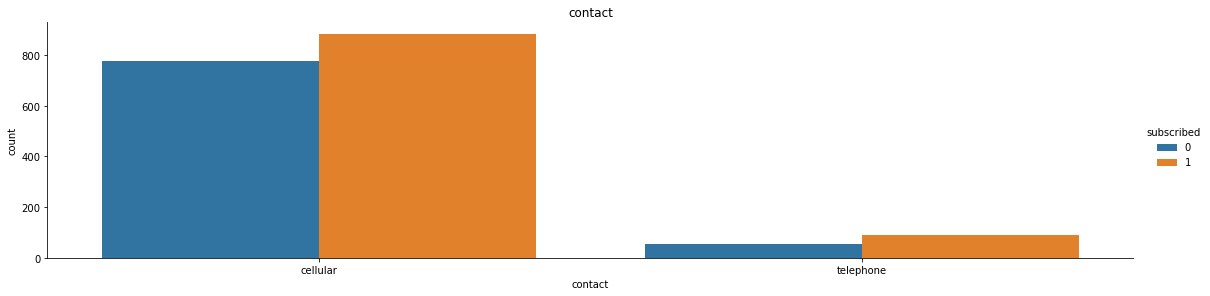

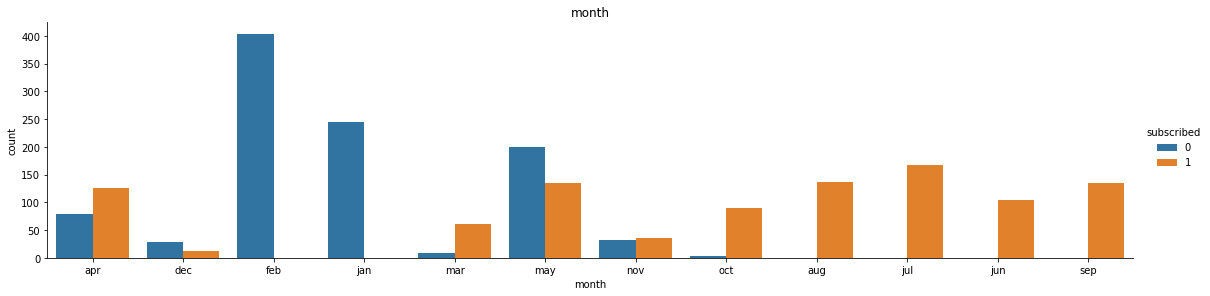

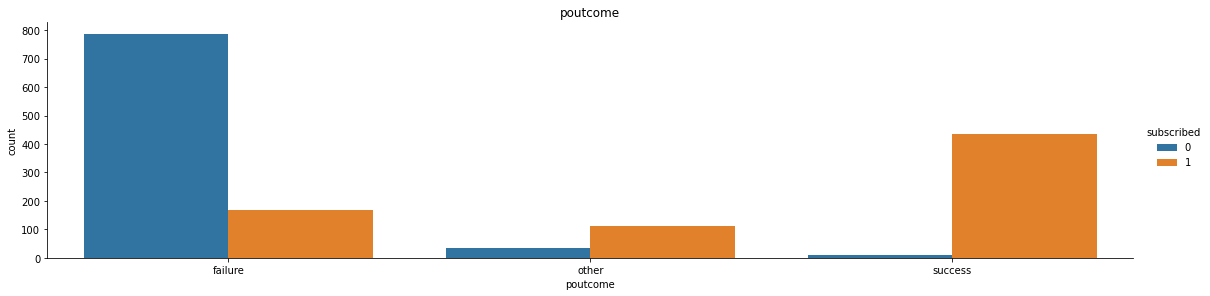

In [15]:
categorical_attributes = df.select_dtypes(include='object').columns.tolist()

for cat_attribute in categorical_attributes:
    sns.catplot(data=df, x=cat_attribute, kind='count', hue='subscribed', height=4, aspect=4)
    plt.title(cat_attribute)
    plt.show()

#### Conclusion
Following are some observations from the catplot():
- `job` : Proportion of subscribers for Management/technician/Admin jobs are higher than other categories.
- `housing` : People without housing loan are most likely to subscribe. 
- `loan`    : People without personal loan are most likely to subscribe. 
- `month`   : Summer months are best times for getting more client subscription while winter months lead to almost zero subscription.
- `poutcome` : Successful outcome of previous marketing campaign leads to better probality of subscription for current campaign.

In my understanding, `loan`, `housing`, `poutcome`, `month` has direct impact on subscription decision as per above plot.

#### pivot table
Let us also try pivot table to find probability of subscription for the categorical attributes.

In [16]:
categorical_attributes = df.select_dtypes(include=['object']).columns.tolist()

# Generate frequency reports for each categorical column
for attribute in categorical_attributes:
    print(df.pivot_table(values='subscribed',
                                index=attribute,
                                aggfunc=lambda x: x.mean()))

               subscribed
job                      
admin.           0.526316
blue-collar      0.258389
entrepreneur     0.333333
housemaid        0.571429
management       0.544469
retired          0.839506
self-employed    0.546875
services         0.303030
student          0.906250
technician       0.413793
unemployed       0.695652
          subscribed
marital             
divorced    0.437209
married     0.450945
single      0.600890
           subscribed
education            
primary      0.387097
secondary    0.453266
tertiary     0.578947
         subscribed
default            
no         0.503275
yes        0.066667
         subscribed
housing            
no         0.768563
yes        0.210800
      subscribed
loan            
no      0.546857
yes     0.172000
           subscribed
contact              
cellular     0.532171
telephone    0.623288
       subscribed
month            
apr      0.614634
aug      1.000000
dec      0.292683
feb      0.000000
jan      0.000000
jul  

#### Observation
`loan`, `housing` and `poutcome` seems to useful indicator because:
- Having no personal loan lead to more probability of subscription. There is a 54% chance of subscription if client has no personal loan.
- Having no housing loan lead to more probability of subscription. There is a 76% chance of subscription if client has no personal loan.
- Success of previous campaign also lead to more subscription (97% chance).

`month` attribute show high probability of subscription throughout the year without clear pattern.

We can combine `loan`, `housing` and `poutcome` together to create a pivot table and visualize via heatmap. 

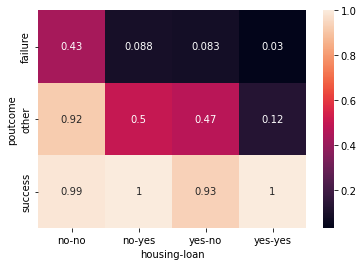

In [17]:
pivot_table_PHL = df.pivot_table(values='subscribed', 
                           index='poutcome', 
                           columns=['housing', 'loan'],
                           aggfunc=lambda x: x.mean())
sns.heatmap(pivot_table_PHL, annot=True)
plt.show()

#### Conclusion
Following are some observations from the pivot_table_PHL heatmap:
- If the outcome of previous marketing campaign is a failure/other, then the probability of subscription to current campaign is more for client having no housing loan and no personal loan. It gets reduced if the client has any one of the loans and probality of subscription is least when client have both loans.
- If the outcome of previous marketing campaign is a success, then the probability of subscription to current campaign for a client is always high irrespective of loan status of the client.

Combining the result of catplot and pivot table analysis, in my opinion, `loan`, `housing` and `poutcome` can be most influencial categorical predictor for subscription. 